In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
train_in = pd.read_csv("../../data/train_in.csv", header=None)
test_in = pd.read_csv("../../data/test_in.csv", header=None)
train_out = pd.read_csv("../../data/train_out.csv", header=None)
test_out = pd.read_csv("../../data/test_out.csv", header=None)

In [3]:
X_train = train_in.to_numpy(dtype=np.float64)
X_test = test_in.to_numpy(dtype=np.float64)
y_train = train_out.to_numpy(dtype=np.int64).ravel()
y_test = test_out.to_numpy(dtype=np.int64).ravel()

In [4]:
num_classes = 10
no_of_examples = X_train.shape[0]
num_features = X_train.shape[1]

rng = np.random.default_rng(2)
W = rng.normal(0, 0.01, size=(num_features, num_classes)).astype(np.float64)
b = rng.normal(0, 0.01, size=(num_classes,)).astype(np.float64)

train_acc_hist, train_loss_hist = [], []

epochs = 100
lr = 0.01

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

for epoch in range(1, epochs + 1):

    total_epoch_loss = 0.0
    correct_per_epoch = 0

    sum_grad_W = 0
    sum_grad_b = 0

    for example in range(no_of_examples):
        x = X_train[example]    # (256,)
        y_true = y_train[example]   # int (0-9)

        scores = b + W.T @ x    # (10,)
        probabilities = softmax(scores) # (10,)

        prediction = np.argmax(probabilities)
        if prediction == y_true:
            correct_per_epoch += 1

        y_vec = np.zeros(num_classes, dtype=np.float64)
        y_vec[y_true] = 1.0

        class_wise_error = probabilities - y_vec

        example_loss = np.sum(class_wise_error ** 2)
        total_epoch_loss += float(example_loss)

        grad_b = 2 * class_wise_error
        grad_W = 2 * np.outer(x, class_wise_error)

        sum_grad_W += grad_W
        sum_grad_b += grad_b

        # W -= lr * grad_W
        # b -= lr * grad_b

    W -= lr * (sum_grad_W / no_of_examples)
    b -= lr * (sum_grad_b / no_of_examples)

    mean_loss = total_epoch_loss / no_of_examples
    epoch_accuracy = correct_per_epoch / no_of_examples

    train_acc_hist.append(epoch_accuracy)
    train_loss_hist.append(mean_loss)

    if epoch_accuracy == 1:
        break

    print(f"Epoch {epoch:02d} | train loss: {mean_loss:.4f} | train acc: {epoch_accuracy:.4f}")

Epoch 01 | train loss: 0.9068 | train acc: 0.0504
Epoch 02 | train loss: 0.8778 | train acc: 0.3357
Epoch 03 | train loss: 0.8473 | train acc: 0.3702
Epoch 04 | train loss: 0.8171 | train acc: 0.3726
Epoch 05 | train loss: 0.7884 | train acc: 0.3796
Epoch 06 | train loss: 0.7618 | train acc: 0.4042
Epoch 07 | train loss: 0.7376 | train acc: 0.4288
Epoch 08 | train loss: 0.7155 | train acc: 0.4517
Epoch 09 | train loss: 0.6954 | train acc: 0.4815
Epoch 10 | train loss: 0.6769 | train acc: 0.5103
Epoch 11 | train loss: 0.6598 | train acc: 0.5349
Epoch 12 | train loss: 0.6440 | train acc: 0.5636
Epoch 13 | train loss: 0.6291 | train acc: 0.5970
Epoch 14 | train loss: 0.6151 | train acc: 0.6210
Epoch 15 | train loss: 0.6018 | train acc: 0.6456
Epoch 16 | train loss: 0.5892 | train acc: 0.6684
Epoch 17 | train loss: 0.5771 | train acc: 0.6842
Epoch 18 | train loss: 0.5654 | train acc: 0.7018
Epoch 19 | train loss: 0.5543 | train acc: 0.7118
Epoch 20 | train loss: 0.5435 | train acc: 0.7264


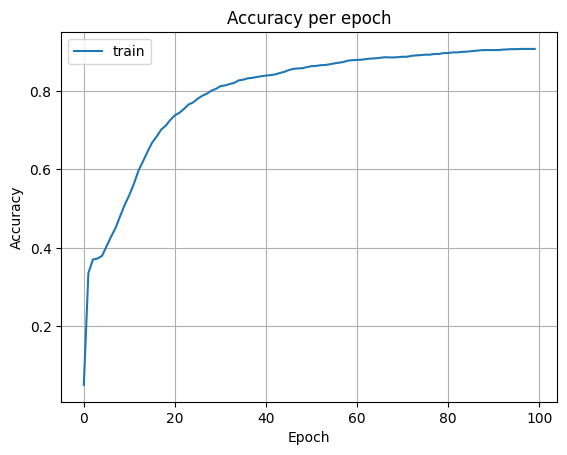

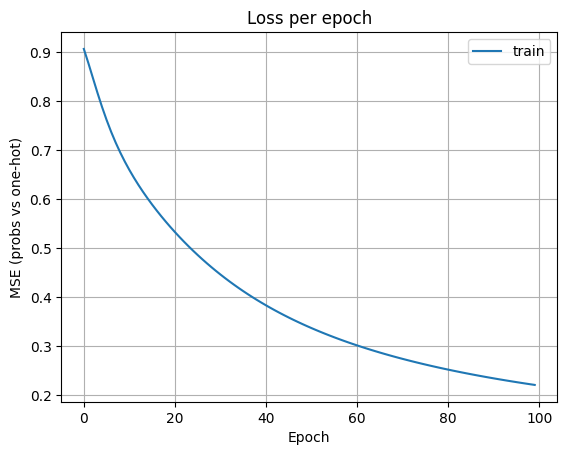

In [5]:
plt.figure()
plt.plot(range(len(train_acc_hist)), train_acc_hist, label="train")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy per epoch")
plt.grid(True); plt.legend()

plt.figure()
plt.plot(range(len(train_loss_hist)), train_loss_hist, label="train")
plt.xlabel("Epoch")
plt.ylabel("MSE (probs vs one-hot)")
plt.title("Loss per epoch")
plt.grid(True); plt.legend()

plt.show()